In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the dataset
data = "C:/Users/asus/OneDrive/Documents/Assignments/SEM-2/ADSC_2910_Integrated Practice 1/Seminar/space data.csv"
space_data = pd.read_csv(data)
# Check for missing values in the dataset
missing_values = space_data.isnull().sum()
missing_values[missing_values > 0]

OBJECT_ID          39
RCS_SIZE          198
COUNTRY_CODE       39
LAUNCH_DATE        39
SITE               39
DECAY_DATE      14372
dtype: int64

In [3]:
space_data.fillna(method='ffill', inplace=True)
space_data.isnull().sum()

CCSDS_OMM_VERS             0
COMMENT                    0
CREATION_DATE              0
ORIGINATOR                 0
OBJECT_NAME                0
OBJECT_ID                  0
CENTER_NAME                0
REF_FRAME                  0
TIME_SYSTEM                0
MEAN_ELEMENT_THEORY        0
EPOCH                      0
MEAN_MOTION                0
ECCENTRICITY               0
INCLINATION                0
RA_OF_ASC_NODE             0
ARG_OF_PERICENTER          0
MEAN_ANOMALY               0
EPHEMERIS_TYPE             0
CLASSIFICATION_TYPE        0
NORAD_CAT_ID               0
ELEMENT_SET_NO             0
REV_AT_EPOCH               0
BSTAR                      0
MEAN_MOTION_DOT            0
MEAN_MOTION_DDOT           0
SEMIMAJOR_AXIS             0
PERIOD                     0
APOAPSIS                   0
PERIAPSIS                  0
OBJECT_TYPE                0
RCS_SIZE                   0
COUNTRY_CODE               0
LAUNCH_DATE                0
SITE                       0
DECAY_DATE    

In [4]:
selected_columns = ['MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS', 'OBJECT_TYPE', 'RCS_SIZE']
data = space_data[selected_columns]
data

,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS,OBJECT_TYPE,RCS_SIZE
0,2.921700,0.652893,7.7156,90.2410,243.1216,38.7796,20668.618,492.864,27784.871,796.095,DEBRIS,MEDIUM
1,13.754973,0.003072,82.9193,299.1120,158.9093,201.3337,7358.038,104.689,1002.507,957.299,DEBRIS,SMALL
2,1.038224,0.023739,12.1717,16.5368,250.1248,146.2900,41197.852,1386.984,35797.696,33841.738,PAYLOAD,LARGE
3,14.775907,0.006062,98.4781,8.7205,37.3771,323.1632,7015.076,97.456,679.465,594.417,DEBRIS,SMALL
4,14.724482,0.006226,98.4232,122.0724,345.1605,27.6061,7031.400,97.796,697.039,609.491,DEBRIS,SMALL
...,...,...,...,...,...,...,...,...,...,...,...,...
14367,15.465781,0.001190,99.0098,214.6827,219.1613,140.8771,6804.882,93.109,434.844,418.650,TBA,LARGE
14368,14.967557,0.005560,99.0272,141.1159,76.8926,283.8489,6955.066,96.208,615.599,538.263,TBA,LARGE
14369,12.909691,0.056673,31.9916,262.9339,162.7824,199.2858,7675.817,111.544,1732.692,862.672,TBA,LARGE
14370,14.245319,0.005822,98.6758,348.3068,187.0288,173.0081,7188.204,101.086,851.919,768.219,TBA,LARGE


In [5]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'OBJECT_TYPE' column with LabelEncoder
data['OBJECT_TYPE'] = encoder.fit_transform(data['OBJECT_TYPE'])

# Custom mapping for RCS_SIZE
custom_mapping = {'SMALL': 1, 'MEDIUM': 2, 'LARGE': 3}

# Apply the custom mapping
data['RCS_SIZE'] = data['RCS_SIZE'].map(custom_mapping)

data

C:\Users\asus\AppData\Local\Temp\ipykernel_10772\3798038054.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['OBJECT_TYPE'] = encoder.fit_transform(data['OBJECT_TYPE'])
C:\Users\asus\AppData\Local\Temp\ipykernel_10772\3798038054.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RCS_SIZE'] = data['RCS_SIZE'].map(custom_mapping)


,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS,OBJECT_TYPE,RCS_SIZE
0,2.921700,0.652893,7.7156,90.2410,243.1216,38.7796,20668.618,492.864,27784.871,796.095,0,2
1,13.754973,0.003072,82.9193,299.1120,158.9093,201.3337,7358.038,104.689,1002.507,957.299,0,1
2,1.038224,0.023739,12.1717,16.5368,250.1248,146.2900,41197.852,1386.984,35797.696,33841.738,1,3
3,14.775907,0.006062,98.4781,8.7205,37.3771,323.1632,7015.076,97.456,679.465,594.417,0,1
4,14.724482,0.006226,98.4232,122.0724,345.1605,27.6061,7031.400,97.796,697.039,609.491,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14367,15.465781,0.001190,99.0098,214.6827,219.1613,140.8771,6804.882,93.109,434.844,418.650,3,3
14368,14.967557,0.005560,99.0272,141.1159,76.8926,283.8489,6955.066,96.208,615.599,538.263,3,3
14369,12.909691,0.056673,31.9916,262.9339,162.7824,199.2858,7675.817,111.544,1732.692,862.672,3,3
14370,14.245319,0.005822,98.6758,348.3068,187.0288,173.0081,7188.204,101.086,851.919,768.219,3,3


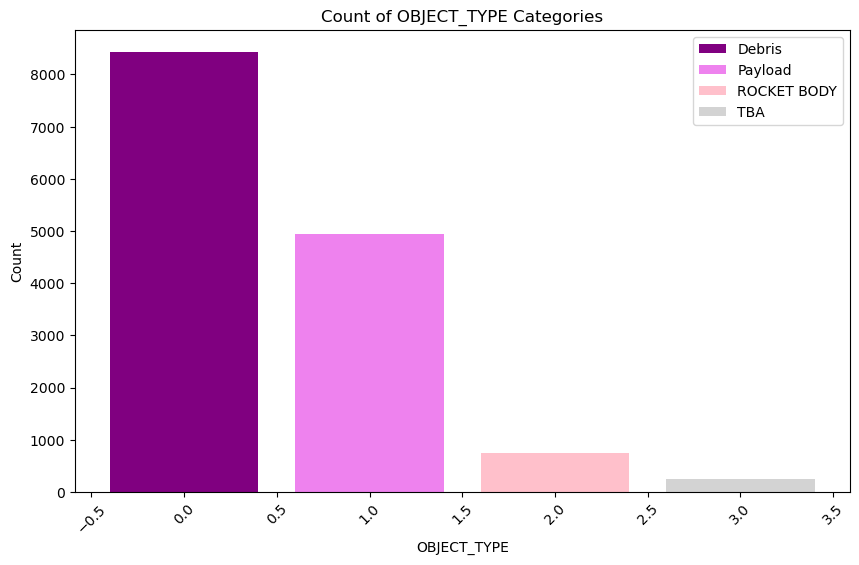

In [6]:
# Count the occurrences of each unique value in 'OBJECT_TYPE'
object_counts = data['OBJECT_TYPE'].value_counts()

# Mapping for OBJECT_TYPE to colors and labels for the legend
object_type_mapping = {
    0 : ('Debris', 'purple'),
    1 : ('Payload', 'violet'),
    2 : ('ROCKET BODY', 'pink'),
    3 : ('TBA', 'lightgrey'),
    # Add more mappings if there are more object types
}

# Create the plot
plt.figure(figsize=(10, 6))
bars = []

# Plot each object type count with its specific color
for object_type, count in object_counts.items():
    bar = plt.bar(object_type, count, color=object_type_mapping[object_type][1])
    bars.append(bar)

# Create a custom legend
plt.legend([bar[0] for bar in bars], [object_type_mapping[object_type][0] for object_type in object_counts.index])

plt.title('Count of OBJECT_TYPE Categories')
plt.xlabel('OBJECT_TYPE')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

In [7]:
# Identify the majority class (DEBRIS, encoded as 0) count
majority_class_count = data['OBJECT_TYPE'].value_counts().max()

# Define the desired sampling strategy: match the majority class count for all classes
sampling_strategy = {0: majority_class_count, 1: majority_class_count, 2: majority_class_count, 3: majority_class_count}

# Prepare features and target for SMOTE
X = data.drop('OBJECT_TYPE', axis=1)
y = data['OBJECT_TYPE']

# Apply SMOTE
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=123)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Reconstruct the balanced DataFrame
balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                           pd.DataFrame(y_resampled, columns=['OBJECT_TYPE'])], axis=1)

# Verify the balancing operation
print(balanced_data['OBJECT_TYPE'].value_counts())

0    8431
1    8431
2    8431
3    8431
Name: OBJECT_TYPE, dtype: int64


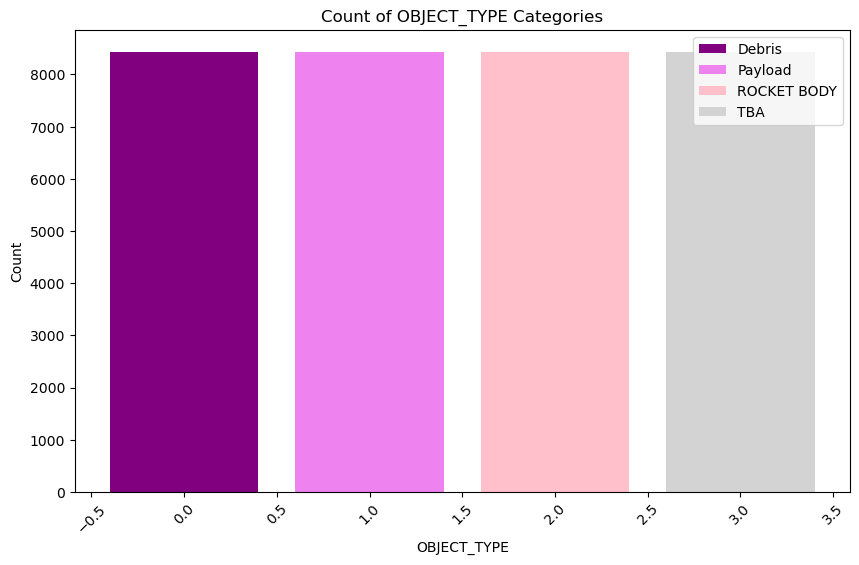

In [8]:
# Count the occurrences of each unique value in 'OBJECT_TYPE'
object_counts = balanced_data['OBJECT_TYPE'].value_counts()

# Mapping for OBJECT_TYPE to colors and labels for the legend
object_type_mapping = {
    0 : ('Debris', 'purple'),
    1 : ('Payload', 'violet'),
    2 : ('ROCKET BODY', 'pink'),
    3 : ('TBA', 'lightgrey'),
    # Add more mappings if there are more object types
}

# Create the plot
plt.figure(figsize=(10, 6))
bars = []

# Plot each object type count with its specific color
for object_type, count in object_counts.items():
    bar = plt.bar(object_type, count, color=object_type_mapping[object_type][1])
    bars.append(bar)

# Create a custom legend
plt.legend([bar[0] for bar in bars], [object_type_mapping[object_type][0] for object_type in object_counts.index])

plt.title('Count of OBJECT_TYPE Categories')
plt.xlabel('OBJECT_TYPE')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

In [9]:
balanced_data.describe()

,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS,RCS_SIZE,OBJECT_TYPE
count,33724.000000,33724.000000,33724.000000,33724.000000,33724.000000,33724.000000,33724.000000,33724.000000,33724.000000,33724.000000,33724.000000,33724.000000
mean,11.694865,0.106806,69.736145,162.501443,170.161619,187.883034,11942.339232,264.663113,8030.358398,3098.050077,2.036917,1.500000
std,5.284318,0.231139,32.331358,113.537065,100.693707,108.763268,10176.791251,433.652949,14652.502375,8157.076465,0.897846,1.118051
min,0.051783,0.000005,0.001400,0.020000,0.008200,0.004800,6542.850000,87.783000,183.393000,73.279000,1.000000,0.000000
25%,12.414438,0.001115,53.050475,52.609577,81.169093,85.622463,6925.319000,95.591503,548.252344,499.844737,1.000000,0.750000
50%,14.418234,0.002457,82.584900,157.283356,164.356747,202.005194,7130.631615,99.873900,792.723500,582.278613,2.000000,1.500000
75%,15.064096,0.017528,97.543300,266.604029,252.016855,281.507042,7880.807250,116.041750,1921.045966,830.066750,3.000000,2.250000
max,16.404097,0.897218,144.586200,359.967900,359.989900,359.981900,304049.635000,27808.429000,372136.402000,224547.015000,3.000000,3.000000


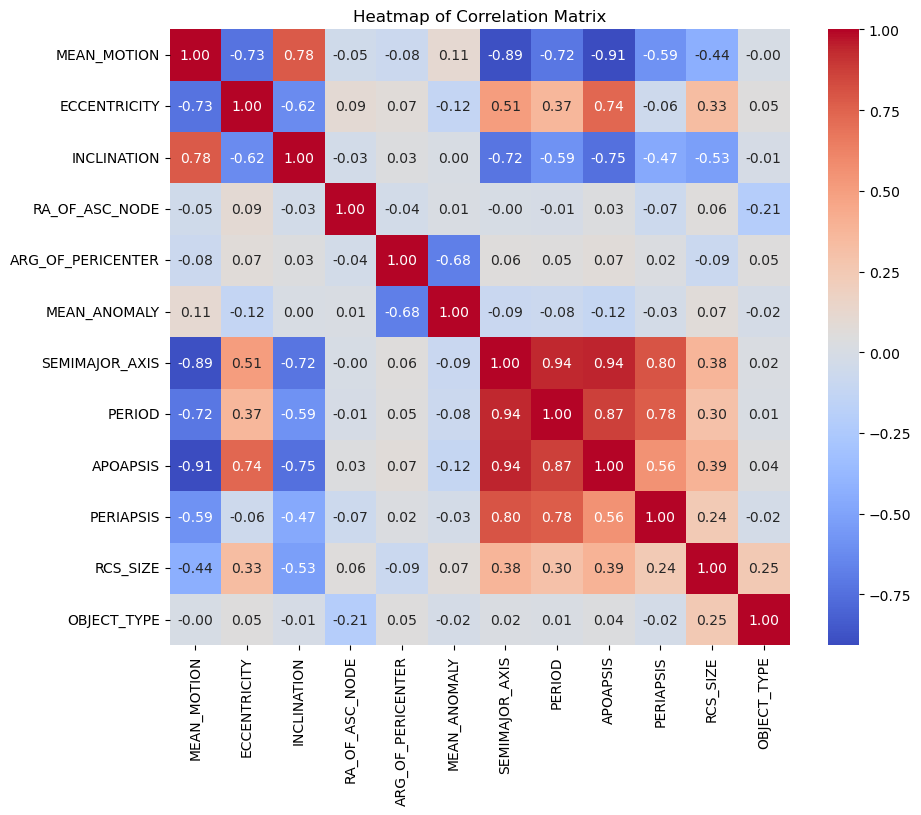

In [10]:

# Calculate the correlation matrix
corr = balanced_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [11]:
# Logistic Regression.

X = balanced_data.drop(['OBJECT_TYPE'], axis=1)  # Features
y = balanced_data['OBJECT_TYPE']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# It's often a good practice to scale the features for models like Logistic Regression and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print(f'The Accuracy Score of the Logistic Regression model is :- {accuracy_score(y_test, y_pred_log_reg)}')

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.88      0.80      1688
           1       0.63      0.63      0.63      1708
           2       0.79      0.67      0.72      1678
           3       0.62      0.58      0.60      1671

    accuracy                           0.69      6745
   macro avg       0.69      0.69      0.69      6745
weighted avg       0.69      0.69      0.69      6745

The Accuracy Score of the Logistic Regression model is :- 0.6902891030392884


In [12]:
# Calculate accuracy on the training set
train_accuracy_log_reg = accuracy_score(y_train, log_reg.predict(X_train_scaled))

# Calculate accuracy on the test set, using the previously computed 'y_pred_log_reg'
test_accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print(f"Training Accuracy (Logistic Regression): {train_accuracy_log_reg}")
print(f"Test Accuracy (Logistic Regression): {test_accuracy_log_reg}")
print("It is as well fitting model because the model performs well on both the training set and the test set, and the accuracies are\nreasonably close, it suggests a good balance between bias and variance.")

Training Accuracy (Logistic Regression): 0.7023610956670002
Test Accuracy (Logistic Regression): 0.6902891030392884
It is as well fitting model because the model performs well on both the training set and the test set, and the accuracies are
reasonably close, it suggests a good balance between bias and variance.


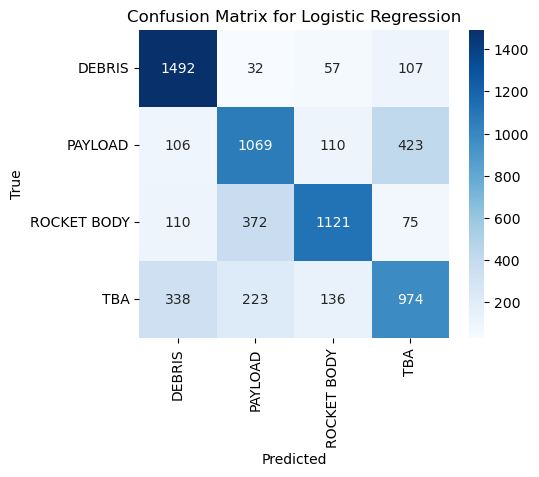

In [13]:
# Confusion Matrix for Logistic Regression
cm2 = confusion_matrix(y_test, y_pred_log_reg)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm2, annot=True, fmt='g', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [14]:
# Fine tuning of Logistic Regression Model.

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
log_reg_grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), parameters, cv=5)
log_reg_grid.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log_reg_grid = log_reg_grid.predict(X_test_scaled)

print(f'The Accuracy Score of the Logistic Regression model after fine tuning is :- {accuracy_score(y_test, y_pred_log_reg_grid)}')

# Calculate accuracy on the training set
train_accuracy_log_reg_grid = accuracy_score(y_train, log_reg_grid.predict(X_train_scaled))

# Calculate accuracy on the test set, using the previously computed 'y_pred_log_reg_grid'
test_accuracy_log_reg_grid = accuracy_score(y_test, y_pred_log_reg_grid)

print(f"Training Accuracy (Logistic Regression): {train_accuracy_log_reg_grid}")
print(f"Test Accuracy (Logistic Regression): {test_accuracy_log_reg_grid}")

The Accuracy Score of the Logistic Regression model after fine tuning is :- 0.6934025203854707
Training Accuracy (Logistic Regression): 0.7061047481374403
Test Accuracy (Logistic Regression): 0.6934025203854707


In [15]:
# SVM.(linear)

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # 'linear' kernel is a common choice; you can also try 'rbf'

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm_linear = svm_model.predict(X_test_scaled)

# Evaluate the model
print("SVM Classification Report(Linear):")
print(classification_report(y_test, y_pred_svm_linear))
print(f'The Accuracy Score of the SVM Classification Report(Linear) model is :- {accuracy_score(y_test, y_pred_svm_linear)}')

SVM Classification Report(Linear):
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      1688
           1       0.71      0.53      0.61      1708
           2       0.71      0.82      0.76      1678
           3       0.65      0.77      0.70      1671

    accuracy                           0.74      6745
   macro avg       0.75      0.74      0.74      6745
weighted avg       0.75      0.74      0.74      6745

The Accuracy Score of the SVM Classification Report(Linear) model is :- 0.7414381022979986


In [16]:
# Calculate accuracy on the training set
train_accuracy_svm_linear = accuracy_score(y_train, svm_model.predict(X_train_scaled))

# Use the previously computed 'y_pred_svm_linear' for test accuracy
test_accuracy_svm_linear = accuracy_score(y_test, y_pred_svm_linear)

print(f"Training Accuracy (SVM, Linear): {train_accuracy_svm_linear}")
print(f"Test Accuracy (SVM, Linear): {test_accuracy_svm_linear}")
print("This SVM (Linear) model neither significantly overfits nor severely underfits, but it does lean more towards underfitting due\nto the not-so-high training accuracy.")

Training Accuracy (SVM, Linear): 0.7456169613403018
Test Accuracy (SVM, Linear): 0.7414381022979986
This SVM (Linear) model neither significantly overfits nor severely underfits, but it does lean more towards underfitting due
to the not-so-high training accuracy.


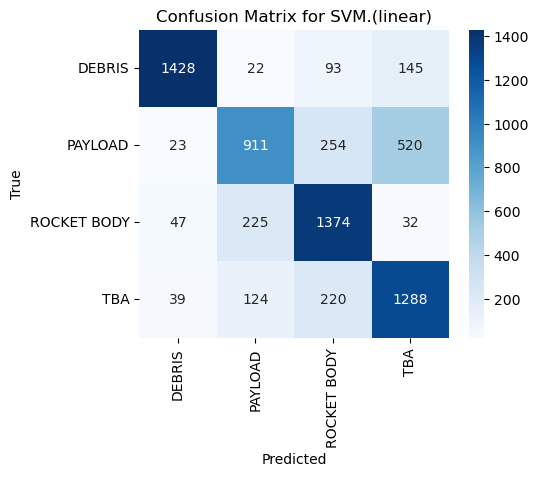

In [17]:
# Confusion Matrix for SVM.(linear)
cm3 = confusion_matrix(y_test, y_pred_svm_linear)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm3, annot=True, fmt='g', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM.(linear)')
plt.show()

In [18]:
# Fine Tuning of SVM(Linear) Model.

parameters_svm_linear = {'C': [0.1, 1, 10]}
svm_linear_grid = GridSearchCV(SVC(kernel='linear', random_state=42), parameters_svm_linear, cv=5)
svm_linear_grid.fit(X_train_scaled, y_train)

y_pred_svm_linear_grid = svm_linear_grid.predict(X_test_scaled)
print(f'The Accuracy Score of the SVM Classification Report(Linear) model after fine tuning is :- {accuracy_score(y_test, y_pred_svm_linear_grid)}')

# Calculate accuracy on the training set
train_accuracy_svm_linear_grid = accuracy_score(y_train, svm_linear_grid.predict(X_train_scaled))

# Use the previously computed 'y_pred_svm_linear' for test accuracy
test_accuracy_svm_linear_grid = accuracy_score(y_test, y_pred_svm_linear_grid)

print(f"Training Accuracy (SVM, Linear) after fine tuning : {train_accuracy_svm_linear_grid}")
print(f"Test Accuracy (SVM, Linear)after fine tuning : {test_accuracy_svm_linear_grid}")

The Accuracy Score of the SVM Classification Report(Linear) model after fine tuning is :- 0.7457375833951075
Training Accuracy (SVM, Linear) after fine tuning : 0.7479521109010712
Test Accuracy (SVM, Linear)after fine tuning : 0.7457375833951075


In [19]:
# SVM.(rbf = Radial Basis function)

# Initialize the SVM model
svm_model = SVC(kernel='rbf', random_state=42)  # 'linear' kernel is a common choice; you can also try 'rbf'

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm_rbf = svm_model.predict(X_test_scaled)

# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm_rbf))
print(f'The Accuracy Score of the SVM Classification Report(rbf) model is :- {accuracy_score(y_test, y_pred_svm_rbf)}')

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1688
           1       0.81      0.60      0.69      1708
           2       0.77      0.90      0.83      1678
           3       0.71      0.80      0.75      1671

    accuracy                           0.80      6745
   macro avg       0.80      0.80      0.79      6745
weighted avg       0.80      0.80      0.79      6745

The Accuracy Score of the SVM Classification Report(rbf) model is :- 0.7970348406226835


In [20]:
# Calculate accuracy on the training set
train_accuracy_svm_rbf = accuracy_score(y_train, svm_model.predict(X_train_scaled))

# You've already computed 'y_pred_svm_rbf' for the test set
test_accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)

print(f"Training Accuracy (SVM, RBF): {train_accuracy_svm_rbf}")
print(f"Test Accuracy (SVM, RBF): {test_accuracy_svm_rbf}")
print("This Model indicates a well-fitted model with a good balance between bias and variance.")

Training Accuracy (SVM, RBF): 0.8062567181882204
Test Accuracy (SVM, RBF): 0.7970348406226835
This Model indicates a well-fitted model with a good balance between bias and variance.


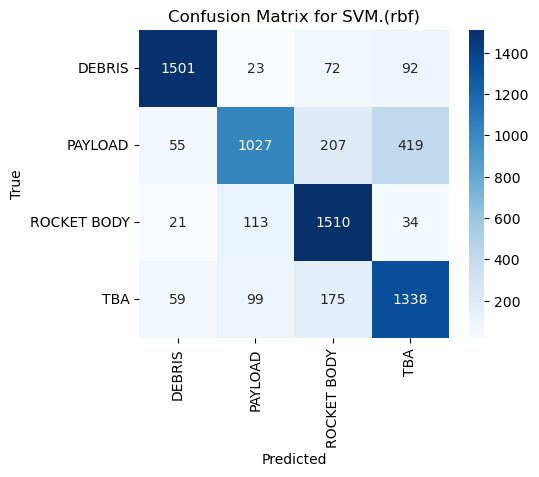

In [21]:
# Confusion Matrix for SVM.(rbf)
cm4 = confusion_matrix(y_test, y_pred_svm_rbf)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm4, annot=True, fmt='g', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM.(rbf)')
plt.show()

In [22]:
# Fine Tuning of SVM(rbf) Model.

parameters_svm = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
svm_rbf_grid = GridSearchCV(SVC(kernel='rbf', random_state=42), parameters_svm, cv=5)
svm_rbf_grid.fit(X_train_scaled, y_train)

y_pred_svm_rbf_grid = svm_rbf_grid.predict(X_test_scaled)
print(f'The Accuracy Score of the SVM Classification Report(rbf) model after fine tuning is :- {accuracy_score(y_test, y_pred_svm_rbf_grid)}')

# Calculate accuracy on the training set
train_accuracy_svm_rbf_grid = accuracy_score(y_train, svm_rbf_grid.predict(X_train_scaled))

# Use the previously computed 'y_pred_svm_linear' for test accuracy
test_accuracy_svm_rbf_grid = accuracy_score(y_test, y_pred_svm_rbf_grid)

print(f"Training Accuracy (SVM, rbf) after fine tuning : {train_accuracy_svm_rbf_grid}")
print(f"Test Accuracy (SVM, rbf)after fine tuning : {test_accuracy_svm_rbf_grid}")

The Accuracy Score of the SVM Classification Report(rbf) model after fine tuning is :- 0.9272053372868791
Training Accuracy (SVM, rbf) after fine tuning : 0.9455502427814226
Test Accuracy (SVM, rbf)after fine tuning : 0.9272053372868791


In [23]:
# Random Forest.

# Split the dataset into features and target variable
X = balanced_data.drop('OBJECT_TYPE', axis=1)  # Features
y = balanced_data['OBJECT_TYPE']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))
print(f'The Accuracy Score of the Random Forest model is :- {accuracy_score(y_test, y_pred)}')

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1688
           1       0.96      0.96      0.96      1708
           2       0.97      0.98      0.98      1678
           3       0.98      0.99      0.98      1671

    accuracy                           0.97      6745
   macro avg       0.97      0.97      0.97      6745
weighted avg       0.97      0.97      0.97      6745

The Accuracy Score of the Random Forest model is :- 0.9737583395107487


In [24]:
# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, clf.predict(X_train))

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print("The Training and Testing Accuracy values are both higher indicates a well-fitting model with low bias and low variance")

Training Accuracy: 1.0
Test Accuracy: 0.9737583395107487
The Training and Testing Accuracy values are both higher indicates a well-fitting model with low bias and low variance


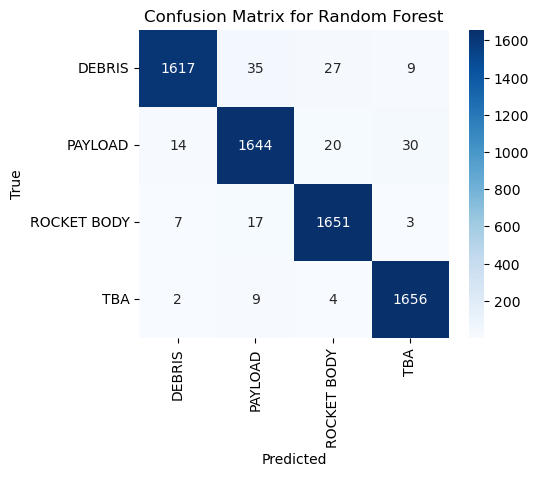

In [25]:
# Confusion Matrix for Random Forest.
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [28]:
# Fine Tuning of Random Forest

parameters_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [0, 10, 20],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), parameters_rf, cv=5)
rf_grid.fit(X_train, y_train)  # Note: Random Forest doesn't require scaled features

# Predictions
y_pred = rf_grid.predict(X_test)

print(f'The Accuracy Score of the Random Forest model after tuning is :- {accuracy_score(y_test, y_pred)}')

# Calculate accuracy on the training set
train_accuracy_rf = accuracy_score(y_train, rf_grid.predict(X_train))

# Calculate accuracy on the test set
test_accuracy_rf = accuracy_score(y_test, y_pred)

print(f"Training Accuracy after tuning:- {train_accuracy_rf}")
print(f"Test Accuracy after tuning:- {test_accuracy_rf}")

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\lib\site-pack

The Accuracy Score of the Random Forest model after tuning is :- 0.9739065974796145
Training Accuracy after tuning:- 0.9988880240186812
Test Accuracy after tuning:- 0.9739065974796145


In [29]:
accuracies = {
    "Model": ["Logistic Regression", "SVM (Linear)", "SVM (RBF)", "Random Forest"],
    "Training Accuracy": [
        train_accuracy_log_reg,  
        train_accuracy_svm_linear,  
        train_accuracy_svm_rbf,  
        train_accuracy  
    ],
    "Testing Accuracy": [
        accuracy_score(y_test, y_pred_log_reg),  # Logistic Regression test accuracy
        accuracy_score(y_test, y_pred_svm_linear),  # SVM (Linear) test accuracy
        accuracy_score(y_test, y_pred_svm_rbf),  # SVM (RBF) test accuracy
        accuracy_score(y_test, y_pred)  # Random Forest test accuracy
    ],
    "Tuned Training Accuracy": [
        train_accuracy_log_reg_grid,
        train_accuracy_svm_linear_grid,
        train_accuracy_svm_rbf_grid,
        train_accuracy_rf
    ],
    "Tuned Testing Accuracy": [
        test_accuracy_log_reg_grid,
        test_accuracy_svm_linear_grid,
        test_accuracy_svm_rbf_grid,
        test_accuracy_rf
    ]
}

# Create a DataFrame
accuracy_df = pd.DataFrame(accuracies)

# Display the DataFrame
accuracy_df

,Model,Training Accuracy,Testing Accuracy,Tuned Training Accuracy,Tuned Testing Accuracy
0,Logistic Regression,0.702361,0.690289,0.706105,0.693403
1,SVM (Linear),0.745617,0.741438,0.747952,0.745738
2,SVM (RBF),0.806257,0.797035,0.945550,0.927205
3,Random Forest,1.000000,0.973907,0.998888,0.973907
